In [251]:
# Imports
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import scipy.optimize as opt 

In [252]:
# Read Data
path = 'D:\\Andrew NG Tasks\\Classification Python\\ex2data1.txt'
data = pd.read_csv(path, header=None, names=['Exam1', 'Exam2', 'Admitted'])

In [253]:
# Show info of the data
print('Data = ')
print(data.head(10))

Data = 
       Exam1      Exam2  Admitted
0  34.623660  78.024693         0
1  30.286711  43.894998         0
2  35.847409  72.902198         0
3  60.182599  86.308552         1
4  79.032736  75.344376         1
5  45.083277  56.316372         0
6  61.106665  96.511426         1
7  75.024746  46.554014         1
8  76.098787  87.420570         1
9  84.432820  43.533393         1


In [254]:
positive = data[data['Admitted'].isin([1])]
negative = data[data['Admitted'].isin([0])]
print('Admitted \n', positive[1:10])
print('===========================')
print('Not Admitted \n', negative[1:10])

Admitted 
         Exam1      Exam2  Admitted
4   79.032736  75.344376         1
6   61.106665  96.511426         1
7   75.024746  46.554014         1
8   76.098787  87.420570         1
9   84.432820  43.533393         1
12  82.307053  76.481963         1
13  69.364589  97.718692         1
15  53.971052  89.207350         1
16  69.070144  52.740470         1
Not Admitted 
         Exam1      Exam2  Admitted
1   30.286711  43.894998         0
2   35.847409  72.902198         0
5   45.083277  56.316372         0
10  95.861555  38.225278         0
11  75.013658  30.603263         0
14  39.538339  76.036811         0
17  67.946855  46.678574         0
20  67.372028  42.838438         0
22  50.534788  48.855812         0


Text(0, 0.5, 'Exam2 score')

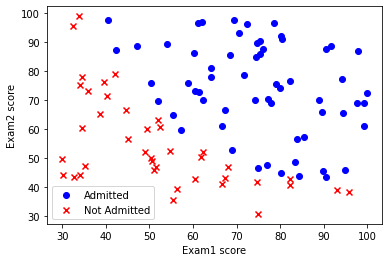

In [255]:
# Plot the data
fig, ax = plt.subplots()
ax.scatter(positive['Exam1'], positive['Exam2'], c='b', marker='o', label='Admitted')
ax.scatter(negative['Exam1'], negative['Exam2'], c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam1 score')
ax.set_ylabel('Exam2 score')


In [256]:
# Cost function.
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cost(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1-y), np.log(1-sigmoid(X * theta.T)))
    return np.sum(first - second) / (len(X))

In [257]:
# Add ones to the data
data.insert(0, 'Ones', 1)
print('New data \n', data[1:10])

# Set X and y
cols = data.shape[1]
X = data.iloc[:, 0:cols-1]
y = data.iloc[:,cols-1:cols]
#print('X = \n', X[1:10])
#print('y = \n', y[1:10])

# Convert to numpy array
X = np.array(X.values)
y = np.array(y.values)
theta = np.zeros(X.shape[1])

# Calculate the cost
this_cost = cost(theta, X, y)
print('Cost when theta (0,0,0) = \n', this_cost)

New data 
    Ones      Exam1      Exam2  Admitted
1     1  30.286711  43.894998         0
2     1  35.847409  72.902198         0
3     1  60.182599  86.308552         1
4     1  79.032736  75.344376         1
5     1  45.083277  56.316372         0
6     1  61.106665  96.511426         1
7     1  75.024746  46.554014         1
8     1  76.098787  87.420570         1
9     1  84.432820  43.533393         1
Cost when theta (0,0,0) = 
 0.6931471805599453


In [258]:
# Calcualte Gradient
def gradient(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)

    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)

    error = sigmoid(X * theta.T) - y
    
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        grad[i] = np.sum(term) / (len(X))

    return grad

In [259]:
# Calculate parametes using an optimiztion function (fmin_tnc)
result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X, y))
cost_after_opt = cost(result[0], X, y)
print('Cost after learning = \n', cost_after_opt)

Cost after learning = 
 0.20349770158947447


In [260]:
# Predict
def predict(theta, X):
    probability = sigmoid(X * theta.T)
    return[1 if x>=0.5 else 0 for x in probability]

theta_learned = np.matrix(result[0])
predictions = predict(theta_learned, X)
correct = [1 if (a == b) else 0 for (a,b) in zip(predictions, y)]
accuracy = sum(map(int,correct)) % len(correct)
print('Accuracy = {0}%'.format(accuracy))

Accuracy = 89%
